In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import sklearn as sk

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

#Import of classifiers:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

### Using Colab (linked to Github):


In [ ]:
# Mount Google Drive.
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# ! pip install -q kaggle
# from google.colab import files
# files.upload()

In [ ]:
# !rm -r /content/drive/MyDrive/kaggle
# !mkdir /content/drive/MyDrive/kaggle
# !mv ./kaggle.json /content/drive/MyDrive/kaggle/
# !chmod 600 /content/drive/MyDrive/kaggle/kaggle.json

In [ ]:
# print("Files:")
# for dirname, _, filenames in os.walk('.'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [ ]:
# API command of the dataset:
#!kaggle datasets download -d alexteboul/diabetes-health-indicators-dataset

In [ ]:
# open the zip file in read mode
# !cp ./diabetes-health-indicators-dataset.zip /content/drive/MyDrive/csvs/diabetes-health-indicators-dataset.zip
# !unzip -q /content/drive/MyDrive/csvs/diabetes-health-indicators-dataset.zip -d /content/drive/MyDrive/csvs
# !rm /content/drive/MyDrive/csvs/diabetes-health-indicators-dataset.zip

In [ ]:
# Use the desired dataset and remove the other 2:
df = pd.read_csv('/content/drive/MyDrive/csvs/diabetes_012_health_indicators_BRFSS2015.csv')
#!rm /content/drive/MyDrive/csvs/diabetes_binary_health_indicators_BRFSS2015.csv
#!rm /content/drive/MyDrive/csvs/diabetes_binary_5050split_health_indicators_BRFSS2015.csv

### Using Kaggle (linked with Github):
https://www.kaggle.com/discussions/general/74235

In [ ]:
# print("Available datasets:")
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [ ]:
# df = pd.read_csv('/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv')

# About this project:
The topic for this project is diagnosis of *Diabetes mellitus*. The used dataset is [diabetes_012_health_indicators_BRFSS2015.csv](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data), a clean dataset of 253 680 survey responses to the [Behavioral Risk Factor Surveillance System (BRFSS) 2015](https://www.cdc.gov/brfss/annual_data/annual_2015.html), from the Centers for Disease Control and Prevention (CDC). [CDC](https://www.cdc.gov/about/organization/mission.htm) is the USA’s leading science-based, data-driven, service organization that protects the public’s health.<br>
The dataset is compound of 22 variables, of which *Diabetes_012* can be considered the target variable. Values for this *Diabetes_012* variable consist of 3 classes:
- 0 is for no diabetes or only during pregnancy,
- 1 is for prediabetes,
- and 2 is for diabetes.  



## *Goals:*
1. **To develop a tool that could assess profesionals in determining the diagnosis of Type II Diabetes.** This illness typically develops at middle age, with mild symptoms at the beginning, hindering an early diagnosis. <br>
A specific objective within building such a tool, is to explore the possibility of predicting pre-diabetes. Pre-diabetes is a reversible stage in the development of Diabetes illness.

2. **To stablish the most influencing factors in diabetes development, and their impact in building a model for diagnosis.** Is it possible to reach a good result selecting only attributes with the most impact?

3. **To study the existance of different types of patients with diabetes**. Clustering data could shed light into higher risk groups.

4. **To deploy the model and use it with some real data**. How much would I(my father who ever need to change in order to be at risk to develop diabetes

## *Structure of the project:*
It must be noted that, like in most Data Science Processes, the conducted workflow was cyclic, going back and forth between different steps (from Preprocessing to Modelling, from Modelling to Evaluation, from Evaluation to Preprocessing...). <br>
However, for the sake of a good, understandable order in the project, it has been determined that all actions carried out will be grouped under the step to which they belong. Reasons and purposes of each action will be explained through comments.

# **Data Science Project: DIAGNOSIS OF DIABETES**

# Data preprocessing:
FIrst step in the Data Science project,

In [ ]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

Dataset consists of the target variable "Diabetes_012", and 21 other independant variables:
- **HighBP**: 1 is has been told they have high blood pressure, 0 is has not.
- **HighChol**: 1 is has been told they have high cholesterol, 0 is has not.
- **CholCheck**: 1 has had cholesterol checked within the past 5 years, 0 is has not.
- **BMI**: Body Mass Index (value equal 1 or greater). Weight in $\text{Kg/(Heigth in m}^{2})$.
- **Smoker**: 1 has smoked at least 100 cigarettes in their entire life, 0 has not.
- **Stroke**: 1 has ever been diagnosed with a stroke, 0 has not.
- **HeartDiseaseorAttack**: 1 has reported having had coronary heart disease (CHD) or myocardial infarction (MI), 0 has not.
- **PhysActivity**: 1 has done physical activity or exercise during the previous 30 days other than their regular job, 0 has not
- **Fruits**: 1 consumes fruit one or more times per day, 0 does not.
- **Veggies**: 1 consumes vegetables one or more times per day, 0 does not.
- **HvyAlcoholCosump**: 1 is a heavy drinker (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week), 0 is not.
- **AnyHealthcare**: 1 has any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service, 0 has not.
- **NoDocbcCost**: 1 there has been a time in the past 12 months when needed to see a doctor but could not because of cost, 0 there has been not.
- **GenHlth**: “Would you say that in general your health is“, state of general health, where 1 is Excellent, 2 is Very good, 3 is Good, 4 is Fair and 5 is Poor.
- **MentHlth**: thinking about mental health (which includes stress, depression, and problems with emotions), the number of days during the past 30 days in which your mental health was not good (value between 0 and 30).
- **PhysHlth**: thinking about physical health (which includes physical illness and injury), the number of days during the past 30 days in which your physical health was not good (value between 0 and 30).
- **DiffWalk**: 1 has serious difficulty walking and climbing stairs, 0 has not.
- **Sex**: 1 is male, 0 is female.
- **Age**: age category from 18 to 99, divided in 13 classes: where 1 is 18 – 24 age, 2 is 25 – 29 age, 3 is 30 - 34 age, 4 is 35 – 39 age, 5 is 40 – 44 age, 6 is 45 – 49 age, 7 is 50 - 54 age, 8 is 55 – 59 age, 9 is 60 – 64 age, 10 is 65 – 69 age, 11 is 70 – 74 age, 12 is 75 – 79 age, 13 is 80 – 99 age.
- **Education**: 1 never attended school, 2 elementary school, 3 some High School, 4 High School graduate, 5 some college or technical school, 6 college graduates
- **Income**: annual household income from all sources: where 1 is (0, 10 000\\$); 2 is (10 000, 15 000\\$); 3 is (15 000, 20 000\\$); 4 is (20 000, 25 000\\$); 5 is (25 000, 35 000\\$); 6 is (35 000, 50 000\\$); 7 is (50 000, 75 000\\$); and 8 is (75 000\\$ or more).  

Source: [Behavioral Risk Factor Surveillance System
2015 Codebook Report](https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf)

## Data cleaning:

### Dealing with impossible and missing values:

Because the dataset is clean and complete (no missing values, no impossible values, no bad formatting), no further preprocessing of data is neccessary in this regards.

In [ ]:
print("MISSING VALUES FOR EACH VARIABLE:")
print(df.isnull().sum(), "\n")
print("SHAPE OF THE DATASET:", df.shape)

MISSING VALUES FOR EACH VARIABLE:
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64 

SHAPE OF THE DATASET: (253680, 22)


#### NUMERICAL FEATURES:
Out of the 22 columns of the dataset, only 5 (*BMI, MentHlth, PhysHlth, Age* and *Income*) are numerical features.
It should be taken into account that *Age* and *Income* have already been grouped in categories, like previously mentioned.

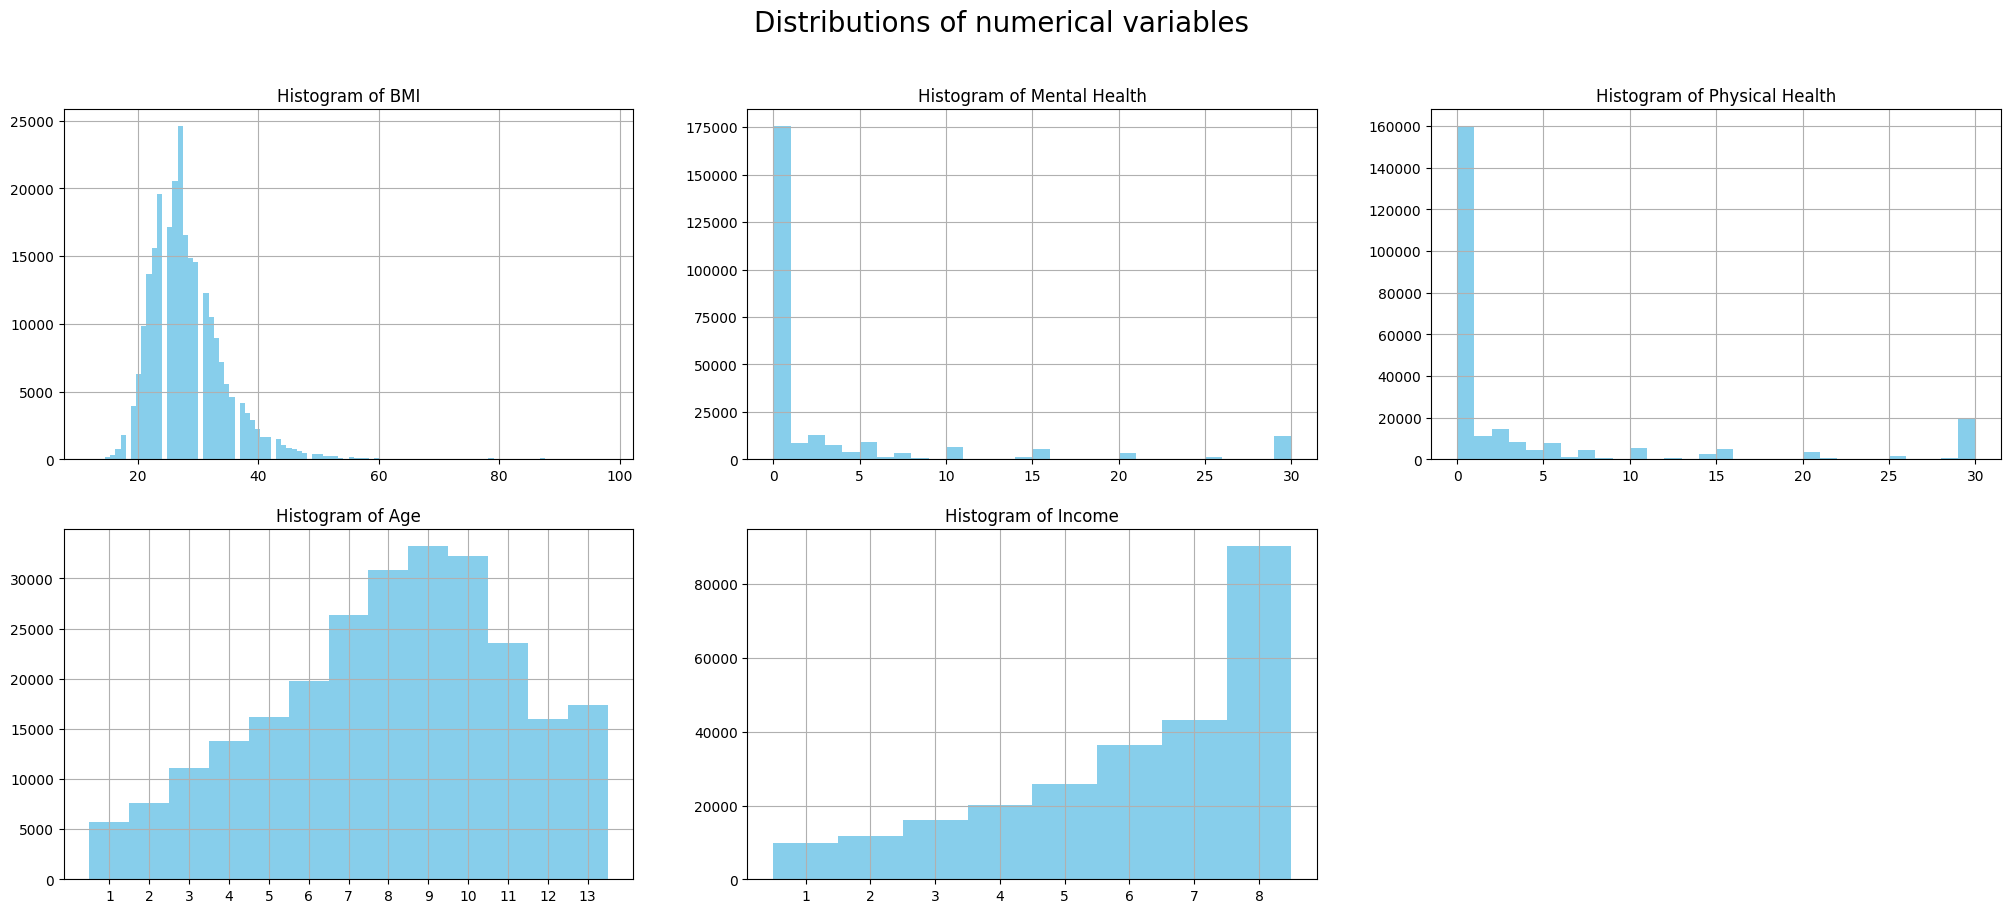

In [ ]:
df_numerical = df[['BMI','MentHlth','PhysHlth','Age','Income']]

# Creation of subplots:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25, 10))

# Flatten the axes array to a 1D array
axes = axes.flatten()#Converting the 2D array of axes objects into a 1D array.
                     #Useful when you want iterating over the subplots,
                     #regardless of whether there is one row or multiple rows.

# Remove empty subplot in row 2, column 3 because it is empty
fig.delaxes(axes[-1])

# Specifications for each subplot
# Subplot for BMI:
axes[0].hist(df_numerical['BMI'], bins=100, color='skyblue')
axes[0].set_title('Histogram of BMI')
axes[0].grid(True)

# Subplot for MentHlth:
axes[1].hist(df_numerical['MentHlth'], bins=30, color='skyblue')
axes[1].set_title('Histogram of Mental Health')
axes[1].grid(True)

# Subplot for PhysHlth:
axes[2].hist(df_numerical['PhysHlth'], bins=30, color='skyblue')
axes[2].set_title('Histogram of Physical Health')
axes[2].grid(True)

# Subplot for Age:
axes[3].hist(df_numerical['Age'], bins=np.arange(0.5, 14, 1), color='skyblue')
axes[3].set_title('Histogram of Age')
axes[3].set_xticks(np.arange(1, 14, 1))  # Set custom xticks
axes[3].grid(True)

# Subplot for Income:
axes[4].hist(df_numerical['Income'], bins=np.arange(0.5, 9, 1), color='skyblue')
axes[4].set_title('Histogram of Income')
axes[4].grid(True)

# Adjust layout
# plt.tight_layout()
plt.suptitle("Distributions of numerical variables", fontsize=20)
plt.show()

#### CATEGORICAL FEATURES:
The rest of the variables in the dataset are categorical, having only a possible prestablished set of possible values. It should be noted that despite their categorical nature, all features have already been transformed into a numerical codification.
Within them, we find those variables which have only 2 possible values (0 or 1), *BI-CATEGORICAL VARIABLES*; and those which have more than 2 possible values, *MULTI-CATEGORICAL ORDINAL VARIABLES*. Also, the latter group can latter be divided into *ORDINAL VARIABLES* that follow an order (like *Education* and *GenHlth*) and *CARDINAL*, like *Diabetes_012*.

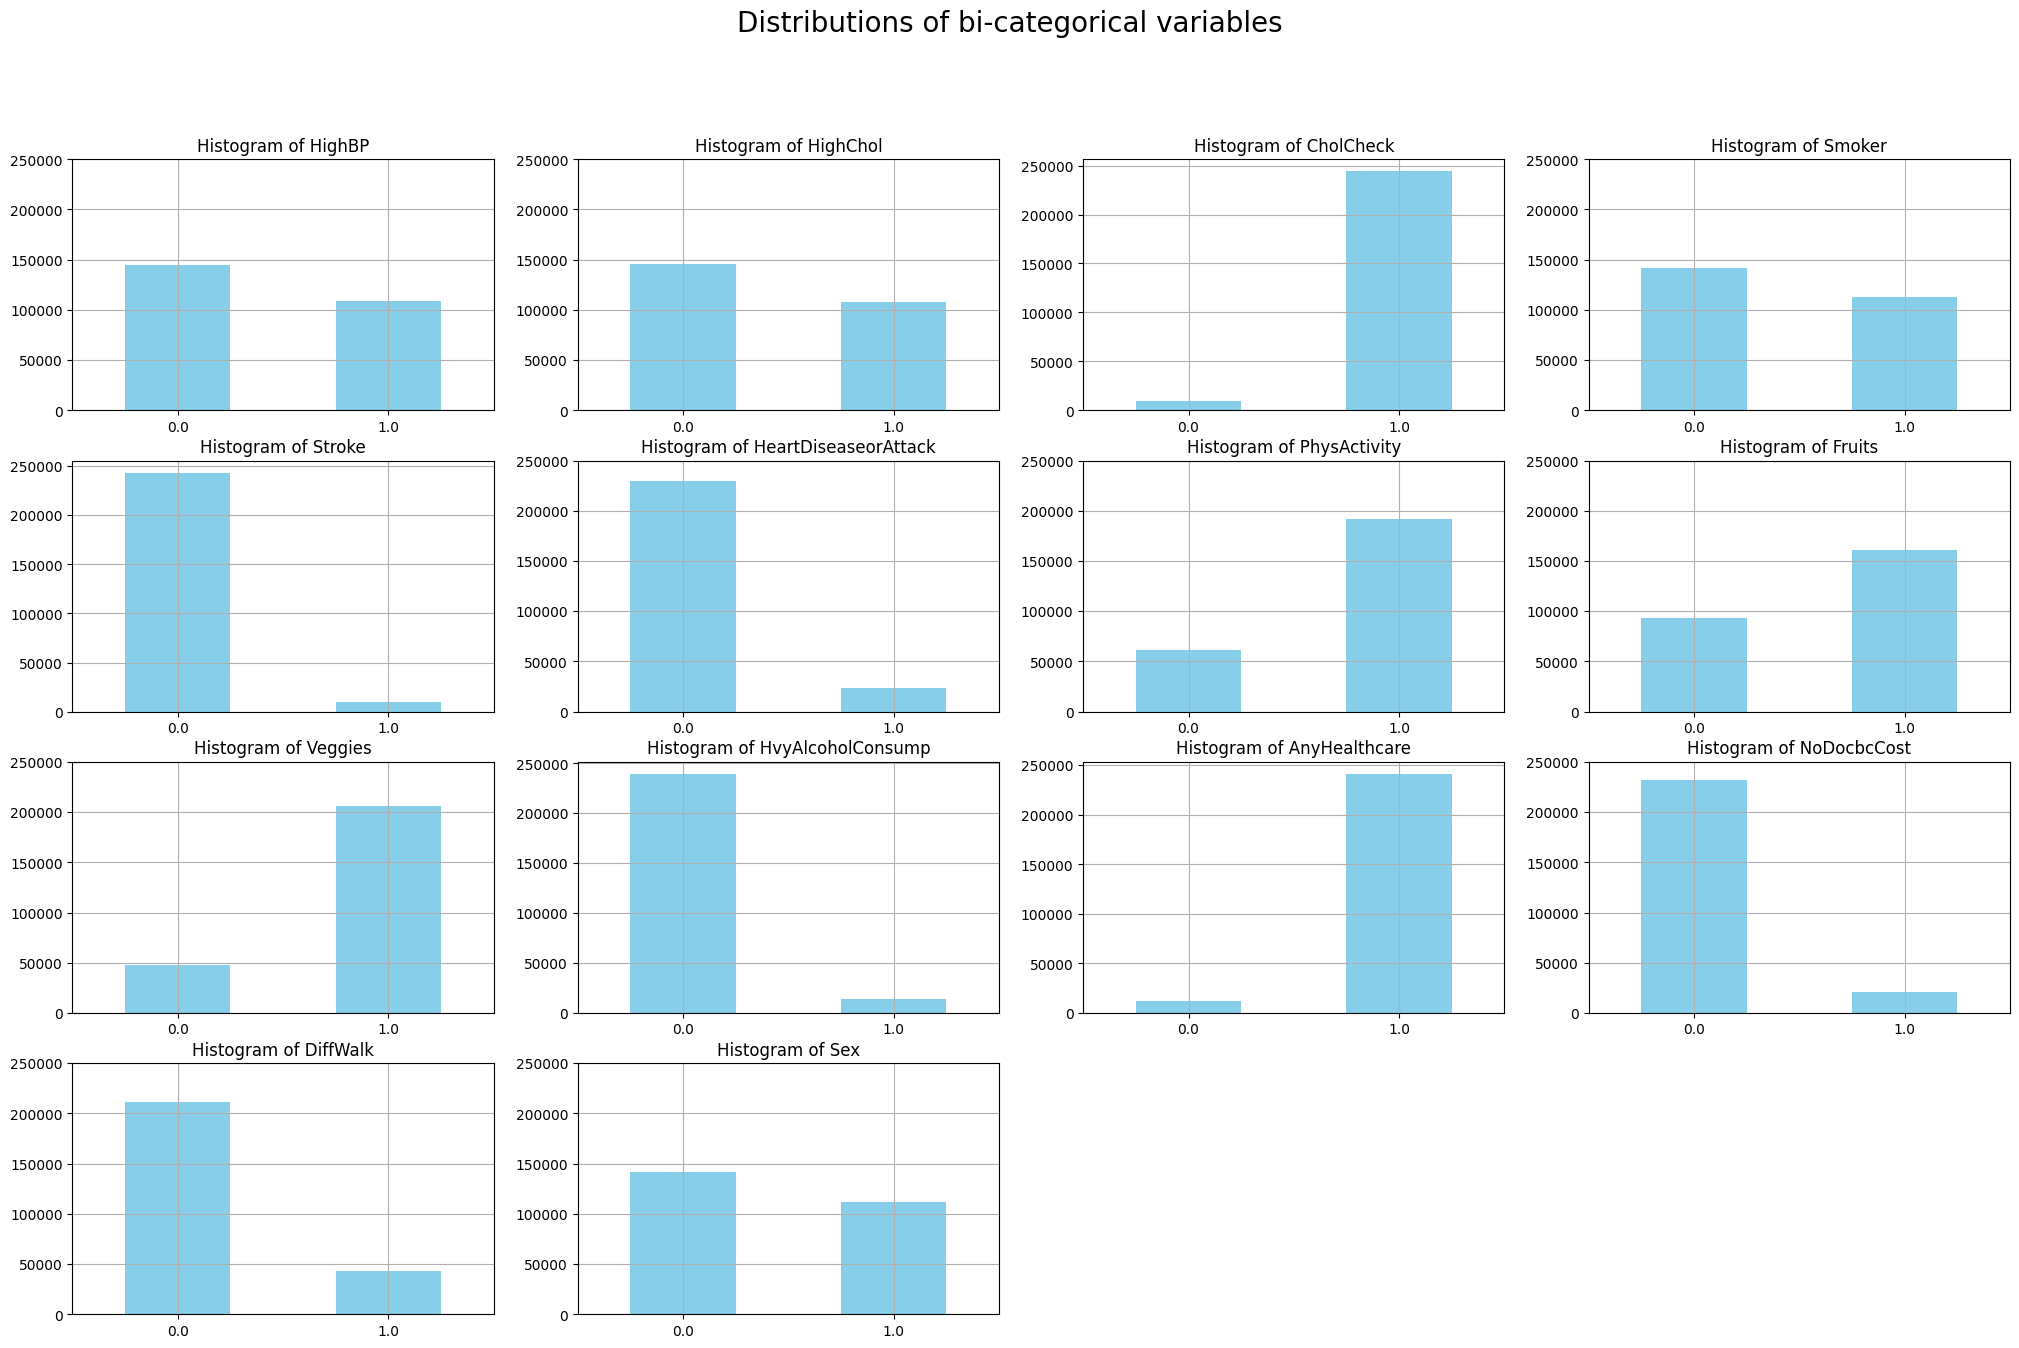

In [ ]:
# BI-CATEGORICAL VARIABLES:
df_biCategorical = df[['HighBP','HighChol','CholCheck','Smoker','Stroke','HeartDiseaseorAttack','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','DiffWalk','Sex']]

# Creation of subplots:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(25, 15)) #'axes' is an array with two elements, 2D.
                                                            # Each 'axes' object represents one subplot.

# Flatten the axes array to a 1D array
axes = axes.flatten()#Converting the 2D array of axes objects into a 1D array.
                     #Useful when you want iterating over the subplots,
                     #regardless of whether there is one row or multiple rows.

# Remove empty subplot in row 2, column 3 because it is empty
fig.delaxes(axes[-2])
fig.delaxes(axes[-1])

for i, feature in enumerate(df_biCategorical.columns):
    ax = axes[i]
    df_biCategorical[feature].value_counts().sort_index().plot(kind='bar', color='skyblue', ax=ax)
    ax.set_title(f'Histogram of {feature}')
    ax.set_xlabel('')
    # Rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_yticks(np.arange(0, 300000, 50000))
    ax.grid(True)

# Adjust layout
plt.suptitle("Distributions of bi-categorical variables", fontsize=20)
#plt.tight_layout()
plt.show()

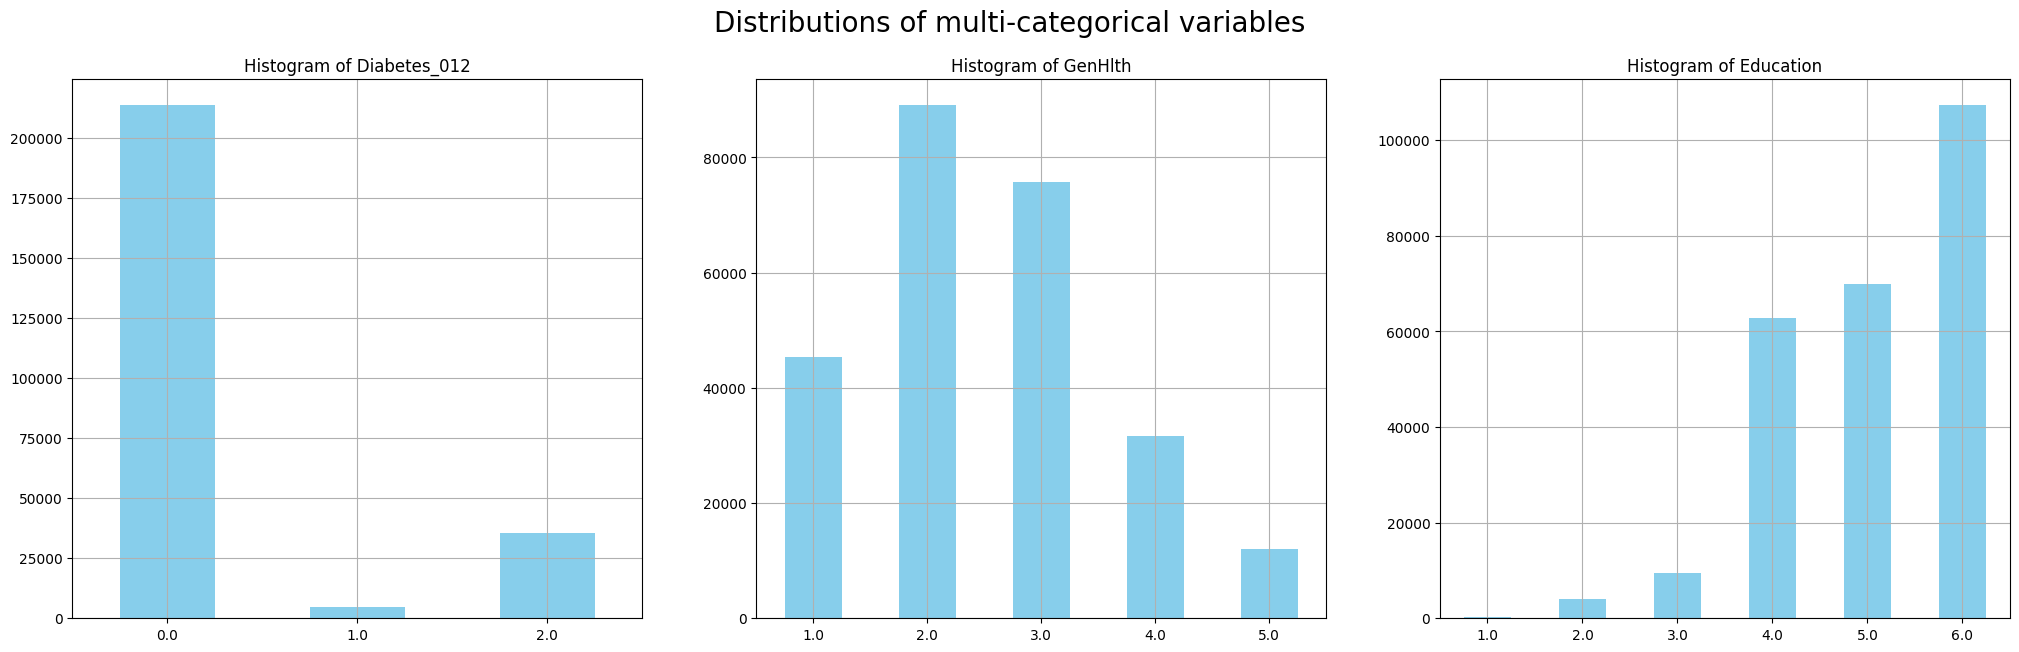

In [ ]:
#MULTI-CATEGORICAL VARIABLES:
df_multiCategorical = df[['Diabetes_012','GenHlth','Education']]

# Creation of subplots:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 7)) #'axes' is an array with two elements, 2D.
                                                            # Each 'axes' object represents one subplot.

for i, feature in enumerate(df_multiCategorical.columns):
    ax = axes[i]
    df_multiCategorical[feature].value_counts().sort_index().plot(kind='bar', color='skyblue', ax=ax)
    ax.set_title(f'Histogram of {feature}')
    ax.set_xlabel('')
    # Rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.grid(True)

# Adjust layout
#plt.tight_layout()
plt.suptitle("Distributions of multi-categorical ordinal variables", fontsize=20)
plt.show()

Feature "Diabetes_012" will be considered as a target class. In this scenario, an imbalance can be observed. In order to tackle this, a data reduction through sampling must be applied.

### Outliers:
A closer look was taken into the numerical features without grouped values, in order to determine the existance of outliers. In particular: "BMI", "PhysHlth", and "MentlHlth".

Text(0.5, 1.0, "Distribution of feature 'Mental Health'")

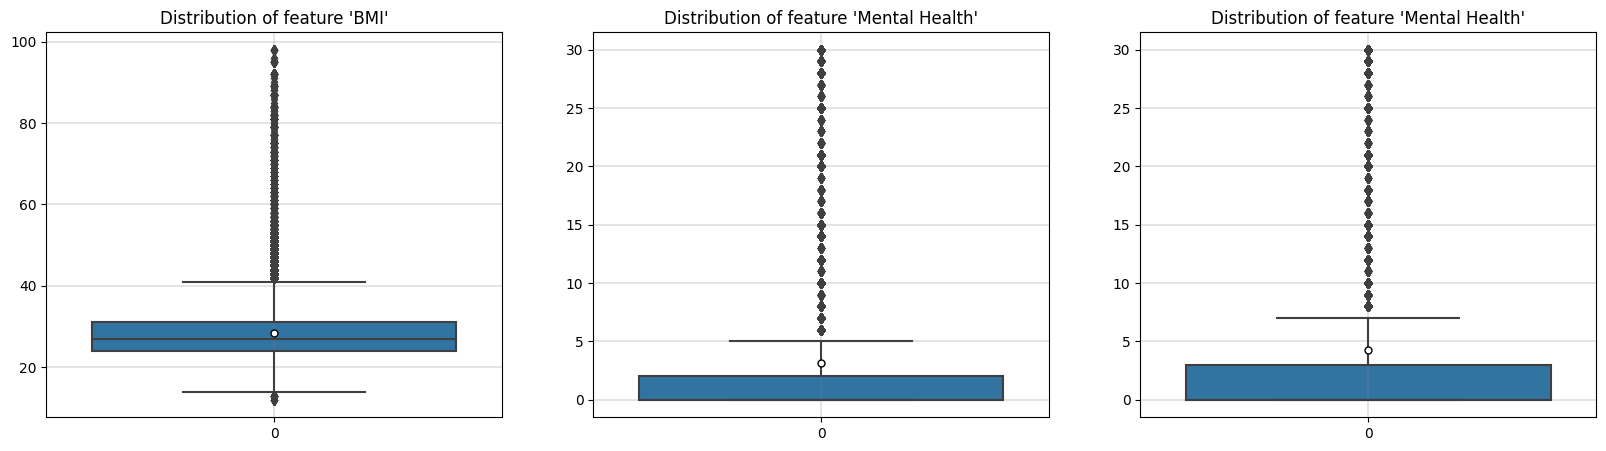

In [ ]:
# Box plots of features with suspected outliers:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

# BMI:
plt.subplot(1,3,1)
sb.boxplot(df_numerical['BMI'],
           showmeans = True,
           meanprops={"marker":"o",
                      "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"5"}
                      )

plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")
plt.title("Distribution of feature 'BMI'")

# Education:
plt.subplot(1,3,2)
sb.boxplot(df_numerical['MentHlth'],
           showmeans = True,
           meanprops={"marker":"o",
                      "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"5"}
                      )

plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")
plt.title("Distribution of feature 'Mental Health'")

# Physical Health:
plt.subplot(1,3,3)
sb.boxplot(df_numerical['PhysHlth'],
           showmeans = True,
           meanprops={"marker":"o",
                      "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"5"}
                      )

plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")
plt.title("Distribution of feature 'Mental Health'")


As shown in the BoxPlot diagrams, many values lie above the last quartile. In the case of PhysHlth and MntlHlth this values lie within the maximum possible value of each feature, which correspond to the worst possible autoperceived states of mental and physical health. Because it is known that bad health condition influences Diabetes and the values are within the possible ranges, this outliers will remain in following analyses.

However, BMI technically has no limit, even though values over 30 kg/m$^{2}$ indicate obesity. In order not to collapse BMI values between 20 and 40 to a small range in a -possible- scaling process, BMI values over 60kg/m$^{2}$ will be transformed to 60kg/m$^{2}$. BMI = 60 kg/m$^{2}$ still mean acute obesity, but the outlier breach will be reduced.

Source:<br>
https://www.cdc.gov/pcd/issues/2019/19_0109.htm <br>
https://www.cdc.gov/healthyweight/assessing/index.html

In [ ]:
num_of_outliers = df_numerical['BMI'][df_numerical['BMI']>60].count()
total_data = df.shape[0]
percentage_of_outliers = (num_of_outliers/total_data) * 100
print(round(percentage_of_outliers, 2),"% of the total data are outliers regarding the feature 'BMI'.")

0.32 % of the total data are outliers regarding the feature 'BMI'.


In [ ]:
#Transformation of the outliers into value 60.
df.loc[df['BMI'] > 60, 'BMI'] = 60

# Max value of "BMI" after transformation of outliers:
print("Maximum value of 'BMI' feature after transformation: ", df["BMI"].max())

Maximum value of 'BMI' feature after transformation:  60.0


## Data reduction

### Removing duplicates in rows:

In [ ]:
originalRows_df = df.copy()
df.drop_duplicates(inplace=True)
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,229772.000000,229772.000000,229772.000000,229772.000000,229772.000000,229772.000000,229772.000000,229772.000000,229772.000000,229772.000000,...,229772.000000,229772.000000,229772.000000,229772.000000,229772.000000,229772.000000,229772.000000,229772.000000,229772.000000,229772.000000
mean,0.325640,0.454459,0.441768,0.959534,28.628410,0.465675,0.044757,0.103220,0.733344,0.612955,...,0.946073,0.092814,2.601179,3.505510,4.675361,0.185514,0.439222,8.086699,4.980529,5.890300
std,0.724634,0.497923,0.496599,0.197050,6.426984,0.498821,0.206771,0.304246,0.442212,0.487075,...,0.225875,0.290172,1.064691,7.713845,9.046697,0.388715,0.496293,3.093776,0.992894,2.092477
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,60.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
print("Number of rows prior to data reduction: ", originalRows_df.shape[0])
print("Number of rows after data reduction: ", df.shape[0])
print(round(((originalRows_df.shape[0]-df.shape[0])/originalRows_df.shape[0])*100, 2), "% of data was duplicated")

Number of rows prior to data reduction:  253680
Number of rows after data reduction:  229772
9.42 % of data was duplicated


When searching for duplicated data, it is observed that the remaining dataset has different characteristics (e.g. maximum values). As the duplicated rows represent afair amount of the data, it is worth to check the distribution of the remaining dataset and compare it to the prior.
Duplicated data could only be apparent due to the continuous numerical variables grouped beforehand. With this comparison between dustributions, apparent duplicated rows can be spotted.

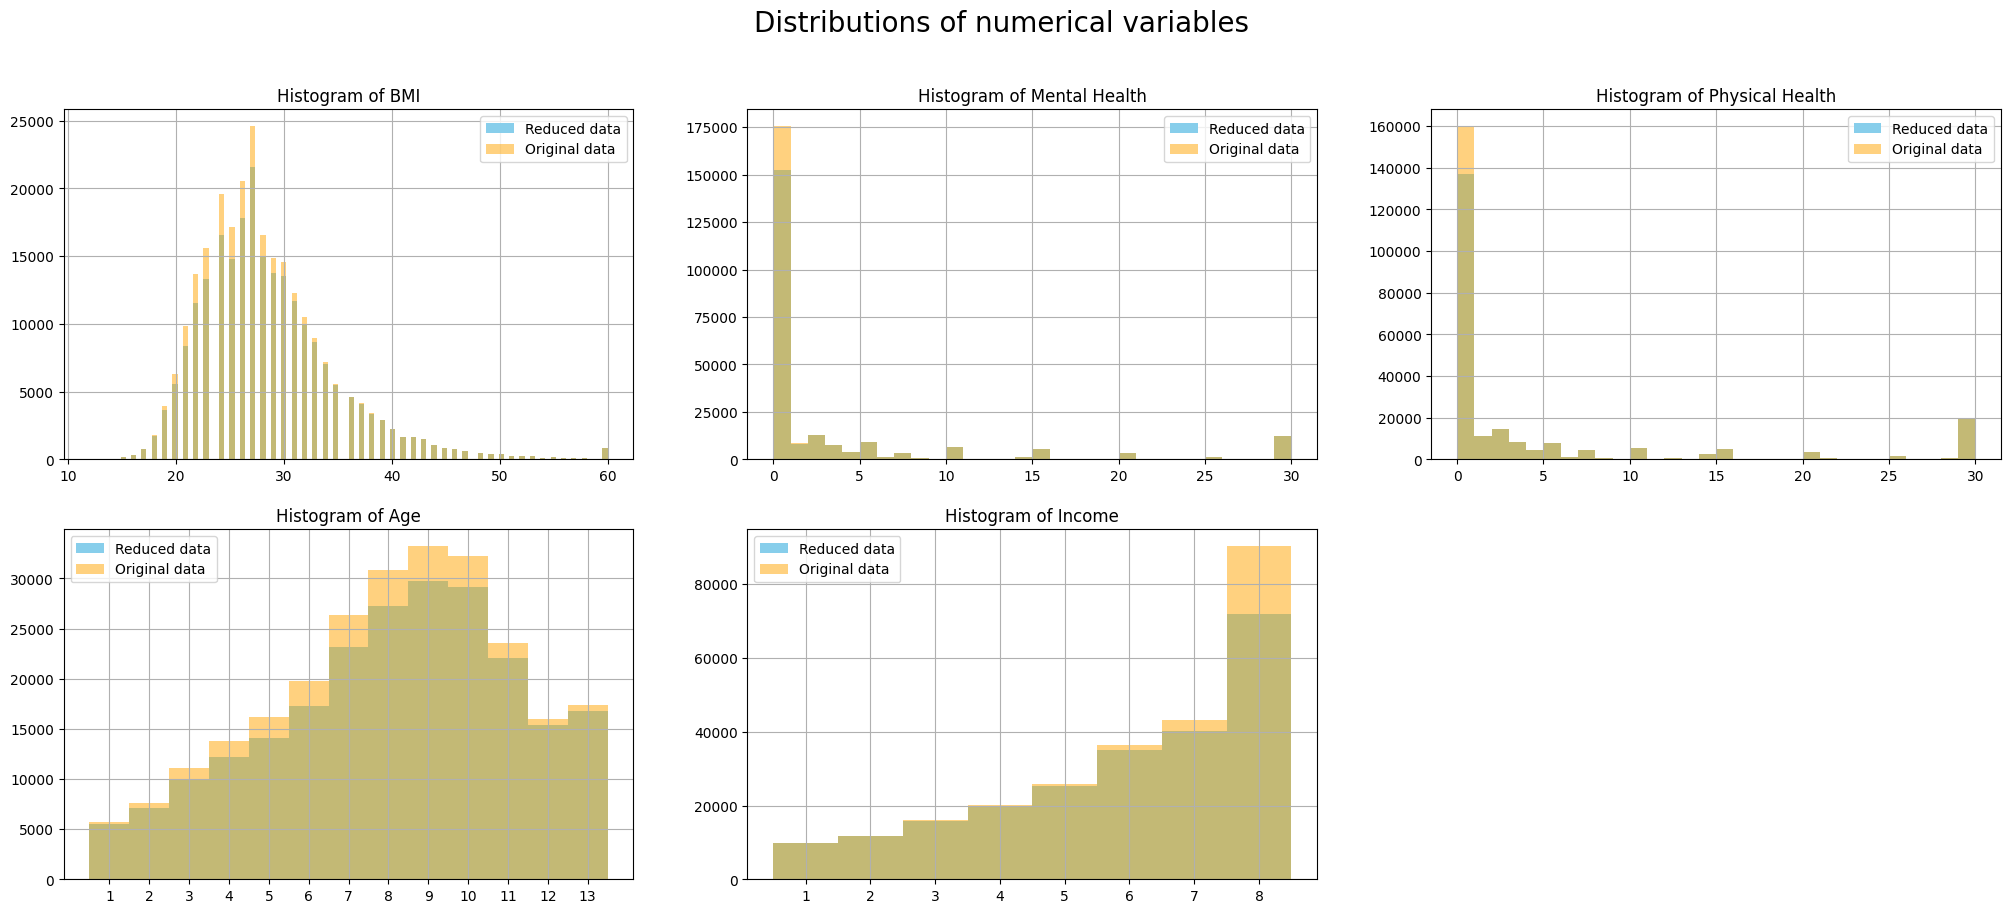

In [ ]:
df_numerical = df[['BMI','MentHlth','PhysHlth','Age','Income']]

# Creation of subplots:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25, 10))

# Flatten the axes array to a 1D array
axes = axes.flatten()#Converting the 2D array of axes objects into a 1D array.
                     #Useful when you want iterating over the subplots,
                     #regardless of whether there is one row or multiple rows.

# Remove empty subplot in row 2, column 3 because it is empty
fig.delaxes(axes[-1])

# Specifications for each subplot
# Subplot for BMI:
axes[0].hist(df_numerical['BMI'], bins=100, color='skyblue', label = "Reduced data")
axes[0].hist(originalRows_df['BMI'], bins=100, color='orange', alpha=0.5, label = "Original data")
axes[0].set_title('Histogram of BMI')
axes[0].legend()
axes[0].grid(True)

# Subplot for MentHlth:
axes[1].hist(df_numerical['MentHlth'], bins=30, color='skyblue', label = "Reduced data")
axes[1].hist(originalRows_df['MentHlth'], bins=30, color='orange', alpha=0.5, label = "Original data")
axes[1].set_title('Histogram of Mental Health')
axes[1].legend()
axes[1].grid(True)

# Subplot for PhysHlth:
axes[2].hist(df_numerical['PhysHlth'], bins=30, color='skyblue', label = "Reduced data")
axes[2].hist(originalRows_df['PhysHlth'], bins=30, color='orange', alpha=0.5, label = "Original data")
axes[2].set_title('Histogram of Physical Health')
axes[2].legend()
axes[2].grid(True)

# Subplot for Age:
axes[3].hist(df_numerical['Age'], bins=np.arange(0.5, 14, 1), color='skyblue', label = "Reduced data")
axes[3].hist(originalRows_df['Age'], bins=np.arange(0.5, 14, 1), color='orange', alpha=0.5, label = "Original data")
axes[3].set_title('Histogram of Age')
axes[3].legend()
axes[3].set_xticks(np.arange(1, 14, 1))  # Set custom xticks
axes[3].grid(True)

# Subplot for Income:
axes[4].hist(df_numerical['Income'], bins=np.arange(0.5, 9, 1), color='skyblue', label = "Reduced data")
axes[4].hist(originalRows_df['Income'], bins=np.arange(0.5, 9, 1), color='orange', alpha=0.5, label = "Original data")
axes[4].set_title('Histogram of Income')
axes[4].legend()
axes[4].grid(True)

# Adjust layout
# plt.tight_layout()
plt.suptitle("Distributions of numerical variables", fontsize=20)
plt.show()

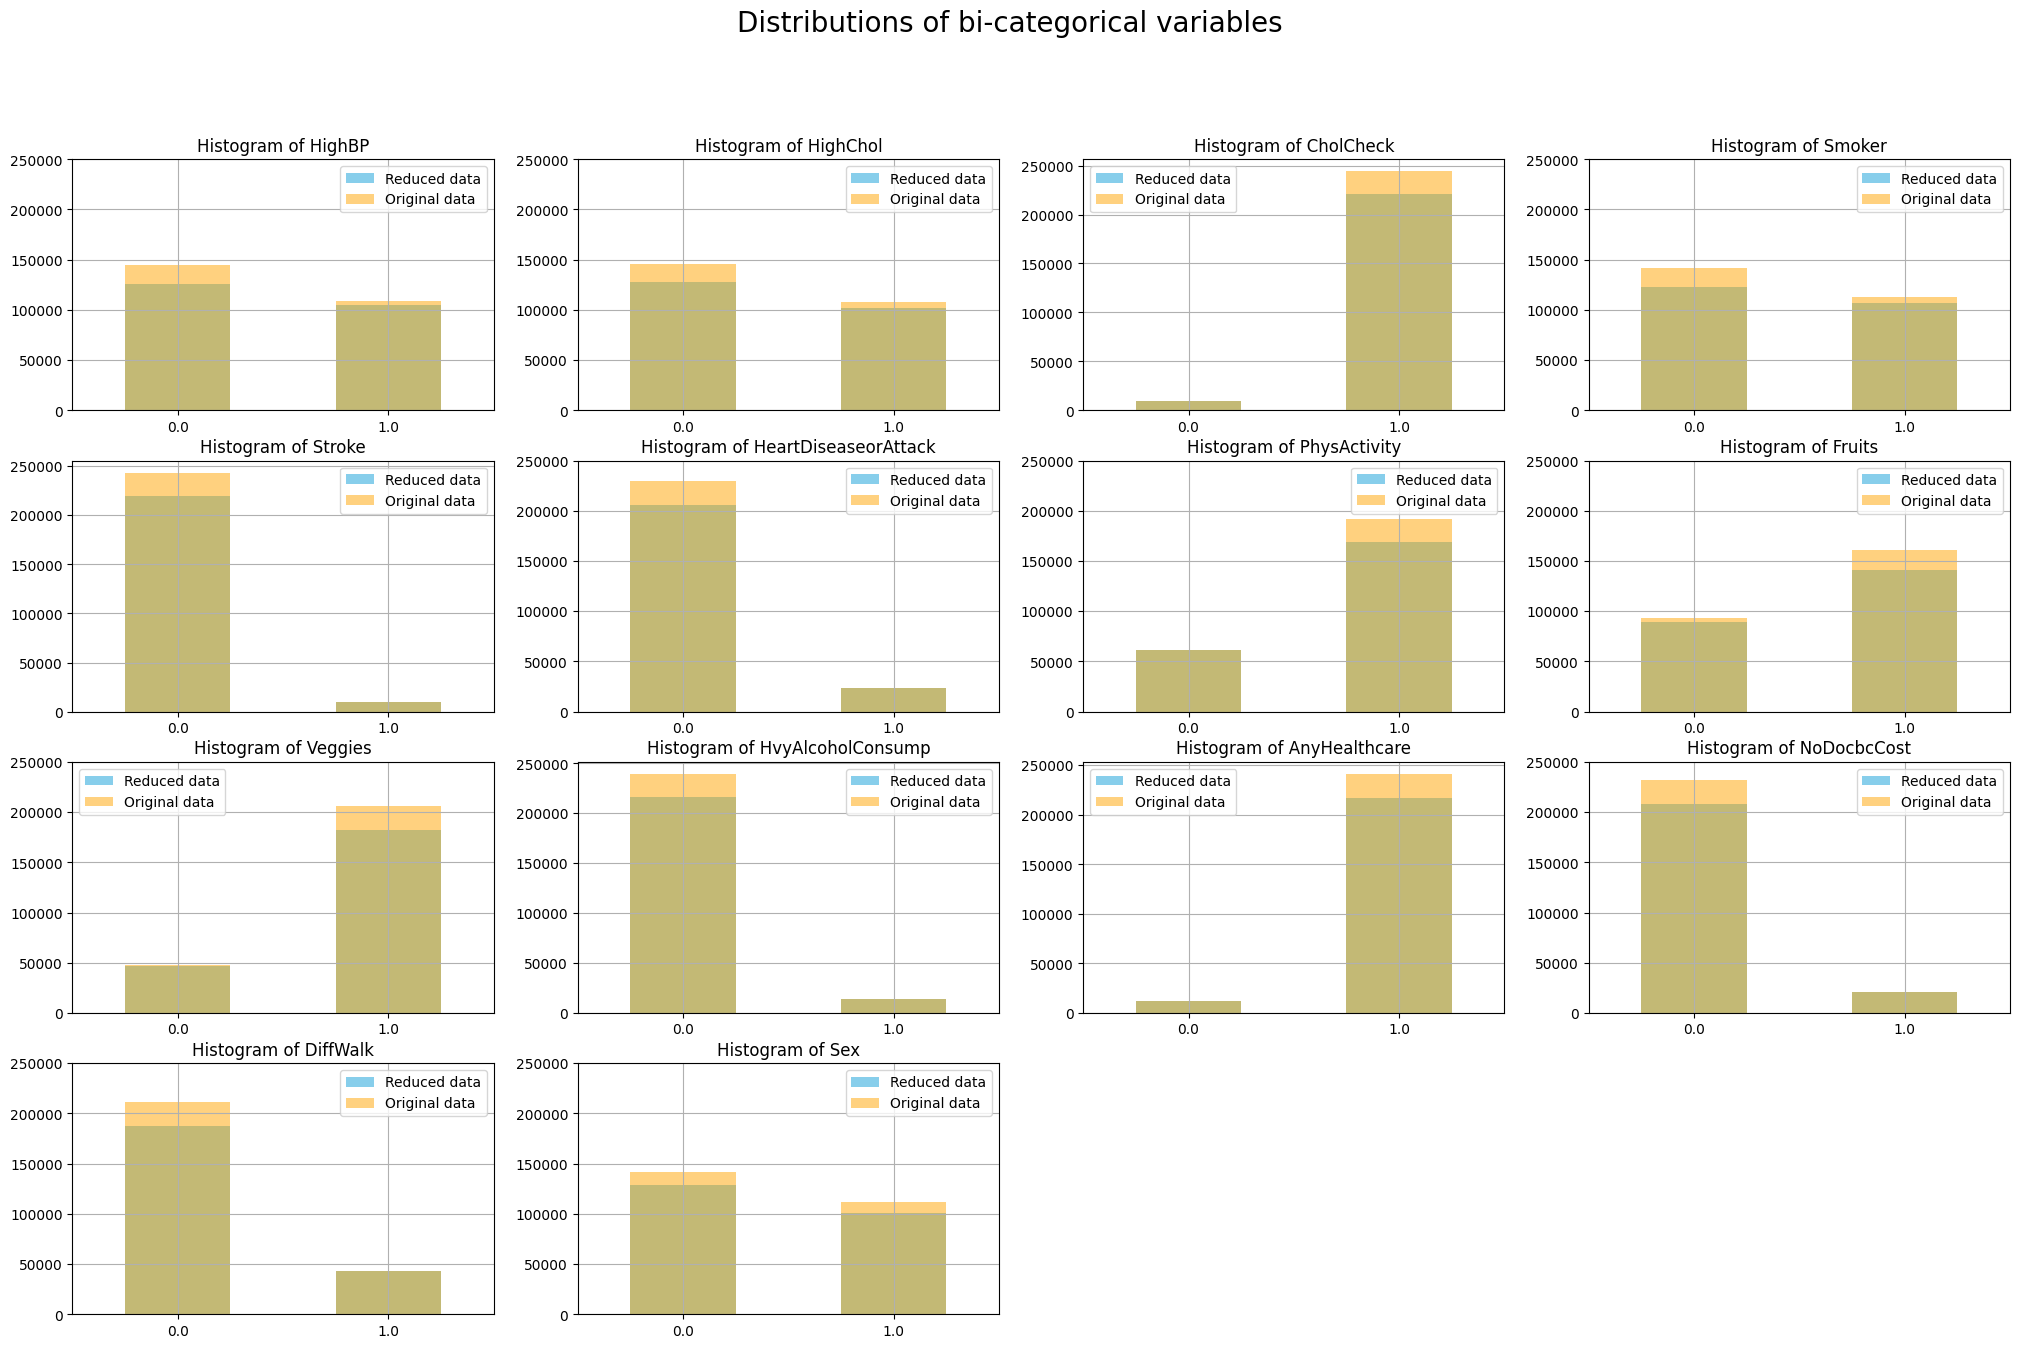

In [ ]:
# BI-CATEGORICAL VARIABLES:
df_biCategorical = df[['HighBP','HighChol','CholCheck','Smoker','Stroke','HeartDiseaseorAttack','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost','DiffWalk','Sex']]

# Creation of subplots:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(25, 15)) #'axes' is an array with two elements, 2D.
                                                            # Each 'axes' object represents one subplot.

# Flatten the axes array to a 1D array
axes = axes.flatten()#Converting the 2D array of axes objects into a 1D array.
                     #Useful when you want iterating over the subplots,
                     #regardless of whether there is one row or multiple rows.

# Remove empty subplot in row 2, column 3 because it is empty
fig.delaxes(axes[-2])
fig.delaxes(axes[-1])

for i, feature in enumerate(df_biCategorical.columns):
    ax = axes[i]
    df_biCategorical[feature].value_counts().sort_index().plot(kind='bar', color='skyblue', ax=ax, label="Reduced data")
    originalRows_df[feature].value_counts().sort_index().plot(kind='bar', color='orange', ax=ax, alpha=0.5, label="Original data")
    ax.set_title(f'Histogram of {feature}')
    ax.set_xlabel('')
    ax.legend()
    # Rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_yticks(np.arange(0, 300000, 50000))
    ax.grid(True)

# Adjust layout
plt.suptitle("Distributions of bi-categorical variables", fontsize=20)
#plt.tight_layout()
plt.show()

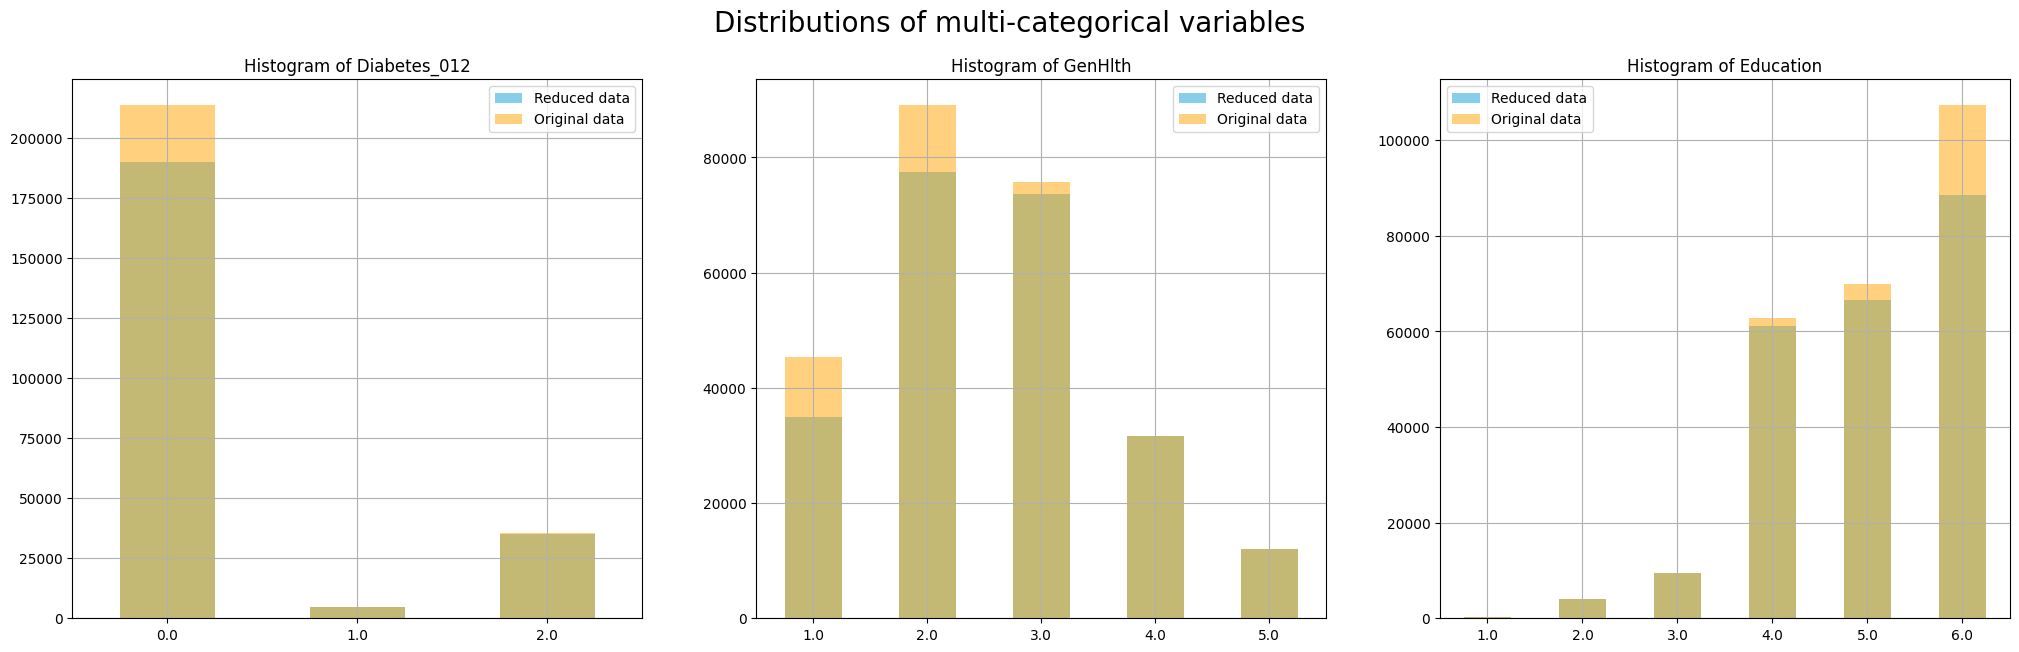

In [ ]:
df_multiCategorical = df[['Diabetes_012','GenHlth','Education']]

# Creation of subplots:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 7)) #'axes' is an array with two elements, 2D.
                                                            # Each 'axes' object represents one subplot.

for i, feature in enumerate(df_multiCategorical.columns):
    ax = axes[i]
    df_multiCategorical[feature].value_counts().sort_index().plot(kind='bar', color='skyblue', ax=ax, label="Reduced data")
    originalRows_df[feature].value_counts().sort_index().plot(kind='bar', color='orange', ax=ax, alpha=0.5, label="Original data")
    ax.set_title(f'Histogram of {feature}')
    ax.set_xlabel('')
    ax.legend()
    # Rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.grid(True)

# Adjust layout
#plt.tight_layout()
plt.suptitle("Distributions of multi-categorical variables", fontsize=20)
plt.show()

After showing this graphs, it can be noted that most of the duplicated data to be deleted belong to the most frequent categories in each feature. Because data of various continuous numerical features had already been grouped into categories beforehand,

### Removing uncorrelated features:  
To have a first look to correlation between features, a heatmap of the dataset is plotted.

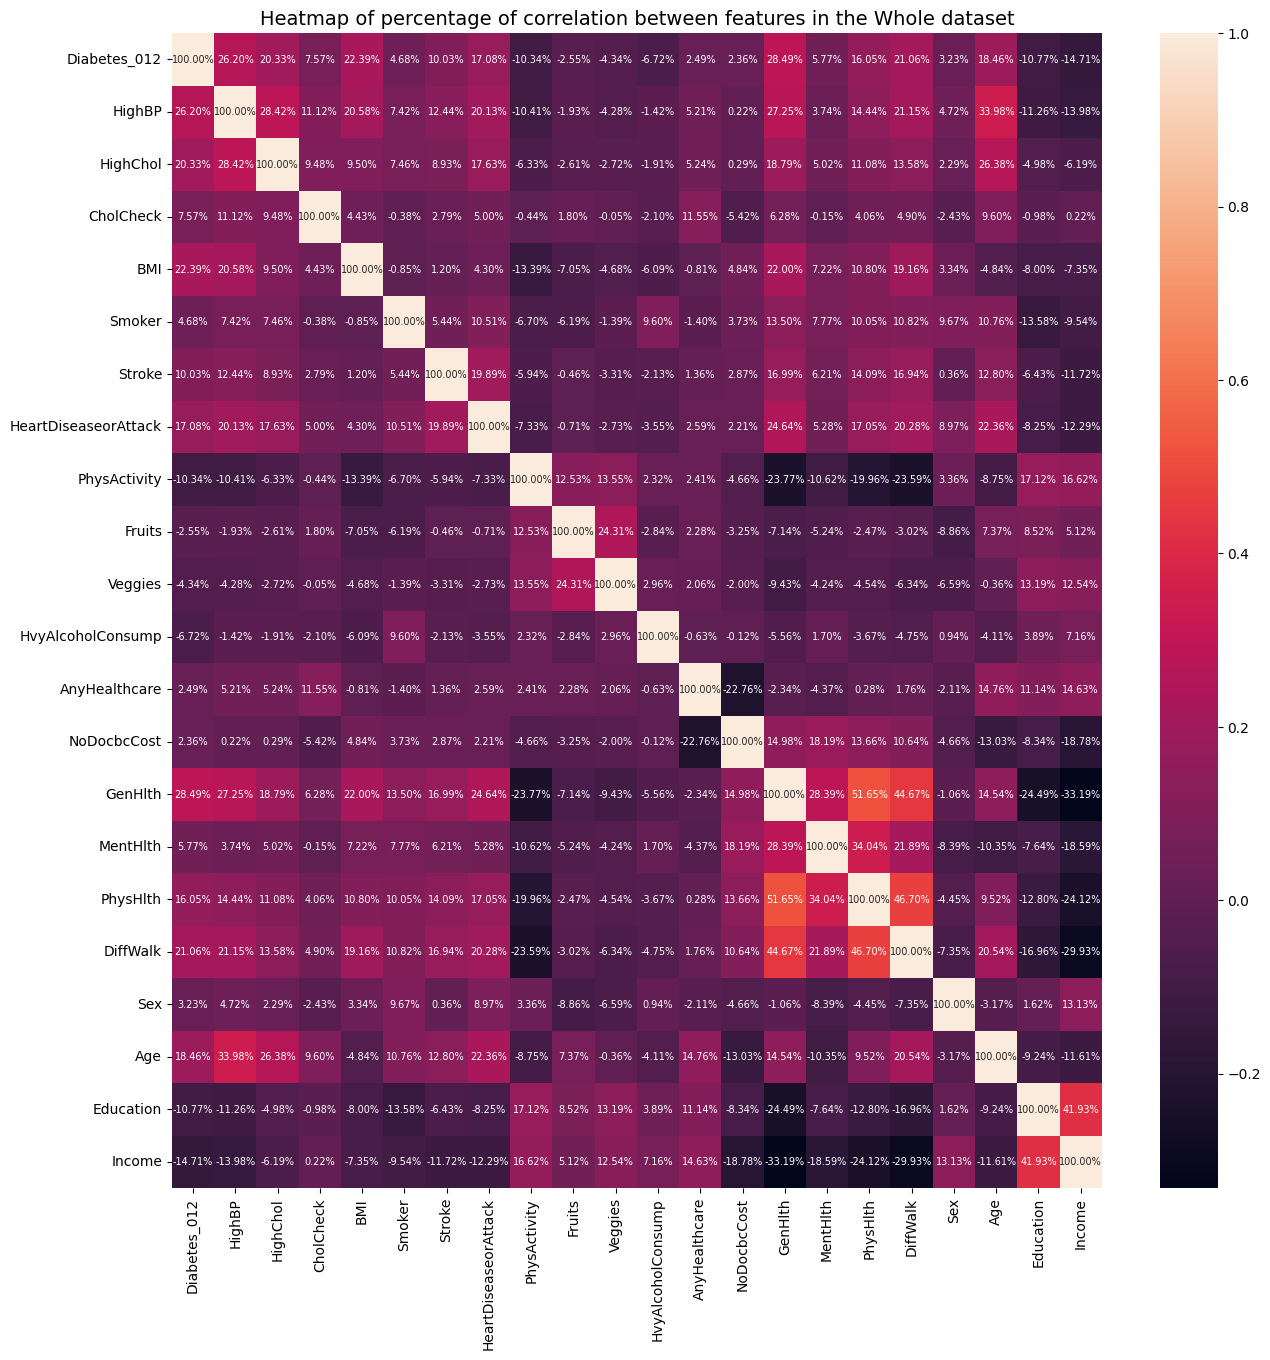

In [ ]:
plt.figure(figsize=(15, 15))
sb.heatmap(df.corr(), annot=True, fmt='.2%', annot_kws={'size': 7})
plt.title('Heatmap of percentage of correlation between features in the Whole dataset', fontsize=14);

In [ ]:
# # Age by diabetes category
# age_order = range(1, 14, 1)
# bplot = sb.countplot(data=df,
#             x="Age",
#             hue="Diabetes_012",
#             order=age_order
#             )

# plt.title("Distribution of Diabetes by Age")
# plt.ylabel("Number of people for each diabetic category")
# plt.grid(color = "grey", linewidth = "0.3", linestyle = "-")
# # Set custom x-axis labels
# custom_labels = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']
# plt.xticks(ticks=range(13), labels=custom_labels, rotation=45, ha='right')
# # add legend and set position to upper right
# plt.legend(title="Diabetic class", loc='upper right');

A first approach to remove uncorrelated features will be selecting those with very little correlation with all the rest of variables.

Function *chooseNoCorrFeatures* selects the features where correlation value with the rest features is under a certain treshold.

In [ ]:
def chooseNoCorrFeatures(corr_treshold, *dataframes):
    """
    Returns a list of features from the datframe,
    that correlate with the rest with values below
    the treshold.
    Parameters:
    > *dataframe: various Dataframes to apply the function
    > corr_treshold: float of maximum correlation
    """
    list_of_feat = []
    for dataframe in dataframes:
        # Ensure that the input is a DataFrame
        if not isinstance(dataframe, pd.DataFrame):
            raise ValueError("Input must be a pandas DataFrame")

        # Transformations to the correlation matrix:
        corr_values = dataframe.corr().abs()
        # Mask the diagonal elements
        np.fill_diagonal(corr_values.values, 0)

        # Choosing features with under a correlation treshold:
        features_noCorr = (corr_values <= corr_treshold).all(axis=1)
        arrayFeat = features_noCorr.index[features_noCorr]
        list_of_feat.extend(arrayFeat)

    return list_of_feat


In [ ]:
#Max correlation value of each feature in the dataframe
#df.corr().replace(1,np.nan).describe().iloc[-1,:]

In [ ]:
features_no_corr=chooseNoCorrFeatures(0.13, df)
features_no_corr

['CholCheck', 'HvyAlcoholConsump']

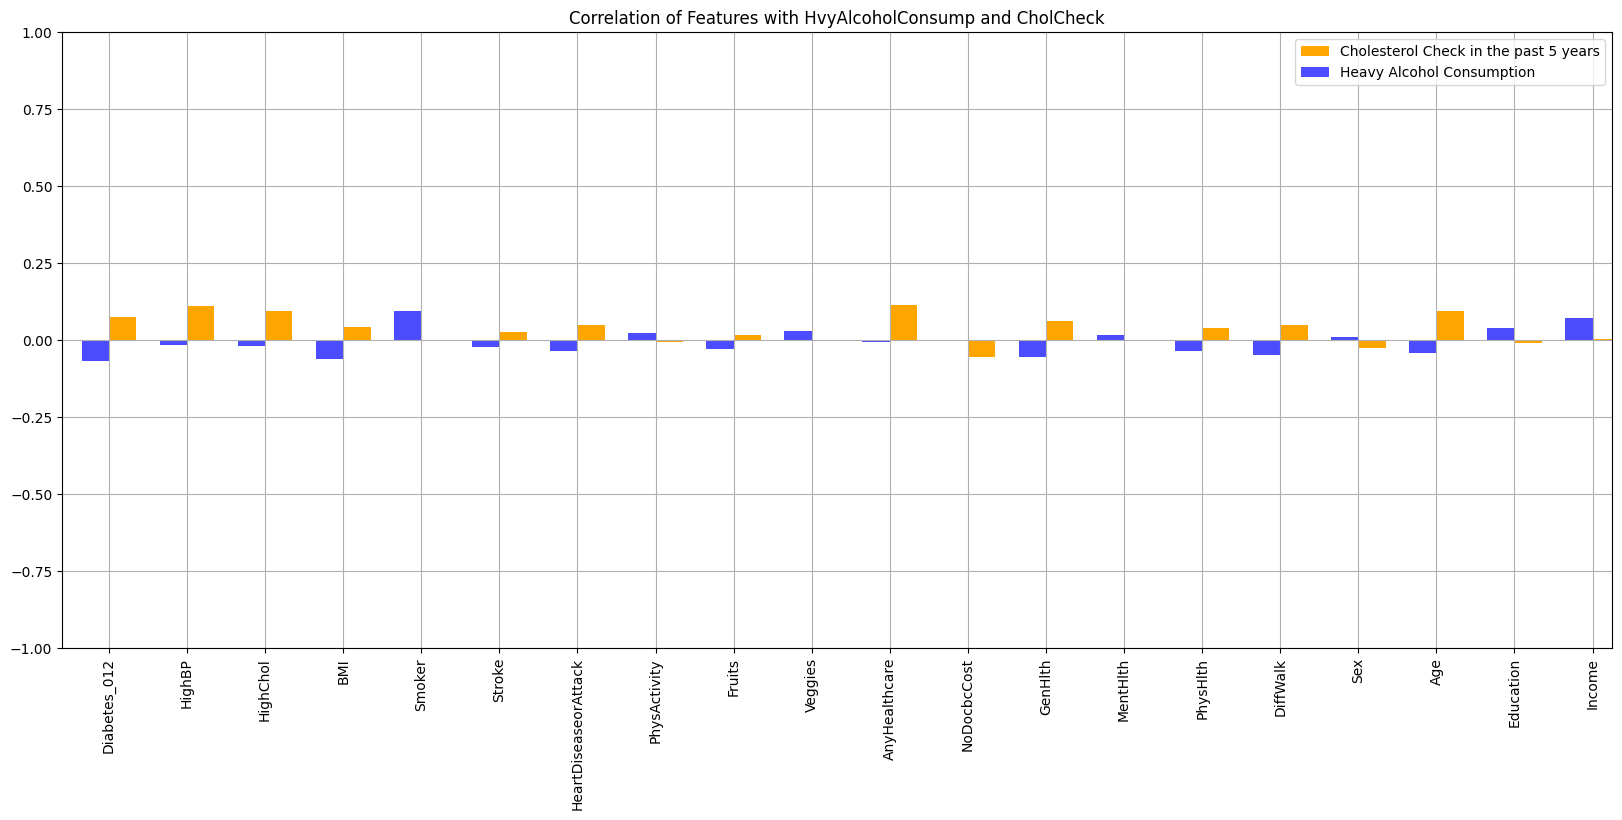

In [ ]:
# Compute correlations
corr=[] # list
for feat in features_no_corr:
    corr.append(df.drop(features_no_corr, axis=1).corrwith(df[features_no_corr[0]]))
    corr.append(df.drop(features_no_corr, axis=1).corrwith(df[features_no_corr[1]]))

# Plot both correlations in the same graph
fig, ax = plt.subplots(figsize=(20, 8))

# Set the positions of the x-axis ticks
indices = np.arange(len(corr[0]))
indices_alcohol = [i + 0.35 for i in indices]

corr[0].plot(kind='bar', grid=True, width=0.35, color="Orange", label="Cholesterol Check in the past 5 years", position=0)
corr[1].plot(kind='bar', grid=True, width=0.35, color="Blue", label="Heavy Alcohol Consumption", position=1, alpha=0.7)
plt.title("Correlation of Features with HvyAlcoholConsump and CholCheck")
# Set x-axis ticks and labels
ax.set_xticklabels(corr[0].index)
# Set y-axis limits
ax.set_ylim(bottom=-1, top=1)  # Adjust the limits as needed
# Add legend
plt.legend()

# Show the plot
plt.show()

Because the little correlation of these features, they are both dropped.

In [ ]:
df_originalFeatures = df.copy()
df.drop(labels=features_no_corr, axis=1, inplace=True)
df.shape

(229772, 20)

### Removing irrelevant features -dimensionality reduction-:
STRATEGY: Low correlated features to "Diabetes_012" will be selected. Before deleting them, their relation to other features will be checked, in order to confirm if another variable can account for their effect in Diabetes diagnosis.

#### First study:
The features that correlate with "Diabetes_012" with values \<0.1 are selected.

In [ ]:
# Features with correlation with "Diabetes_012" < 0.1
no_corr_diabetes = df.columns[(df.corr()["Diabetes_012"]<0.1)]
no_corr_diabetes

Index(['Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'AnyHealthcare',
       'NoDocbcCost', 'MentHlth', 'Sex', 'Education', 'Income'],
      dtype='object')

A closer analysis of this features is conducted, selecting for each of them the attribute with most correlation.<br>

In [ ]:
# Max correlation value of this features in the whole dataframe
max_values_ncd = df.corr().replace(1,np.nan).abs().describe().loc['max', no_corr_diabetes]

In [ ]:
# Attributes to which they correlate the most.
intermediate_correlations=[]
for feature in max_values_ncd.index:
    name = df.columns[df.corr().abs()[feature]==max_values_ncd[feature]].tolist() # for every index in max_values_ncd,
    intermediate_correlations.append(name[0])                                     # find the column name where value
                                                                                  # matches the value in max_values_ncd
    print(feature," is most correlated to ", name[0])

Smoker  is most correlated to  Education
PhysActivity  is most correlated to  GenHlth
Fruits  is most correlated to  Veggies
Veggies  is most correlated to  Fruits
AnyHealthcare  is most correlated to  NoDocbcCost
NoDocbcCost  is most correlated to  AnyHealthcare
MentHlth  is most correlated to  PhysHlth
Sex  is most correlated to  Income
Education  is most correlated to  Income
Income  is most correlated to  Education


In [ ]:
# df1.drop('Diabetes_binary', axis=1).corrwith(df1.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8)
# , title="Correlation with Diabetes_binary",color="Orange");

It is observed that many of the attributes related to non-influencing-diabetes features, do have some significant effect in other features very related to diabetes. In other words, indirectly, this apparently low-correlated features have an impact on the Diabetes diagnosis through *intermediate* features. They are features that may connect the effect of the low-correlated-variables to 'Diabetes_012'

In [ ]:
intermediate_corr = list(set(intermediate_correlations))
print("List of 'intermediate' features in the effect of low-correlated-features to 'Diabetes_012':\n", intermediate_corr)

List of 'intermediate' features in the effect of low-correlated-features to 'Diabetes_012':
 ['Fruits', 'NoDocbcCost', 'PhysHlth', 'Income', 'Veggies', 'AnyHealthcare', 'Education', 'GenHlth']


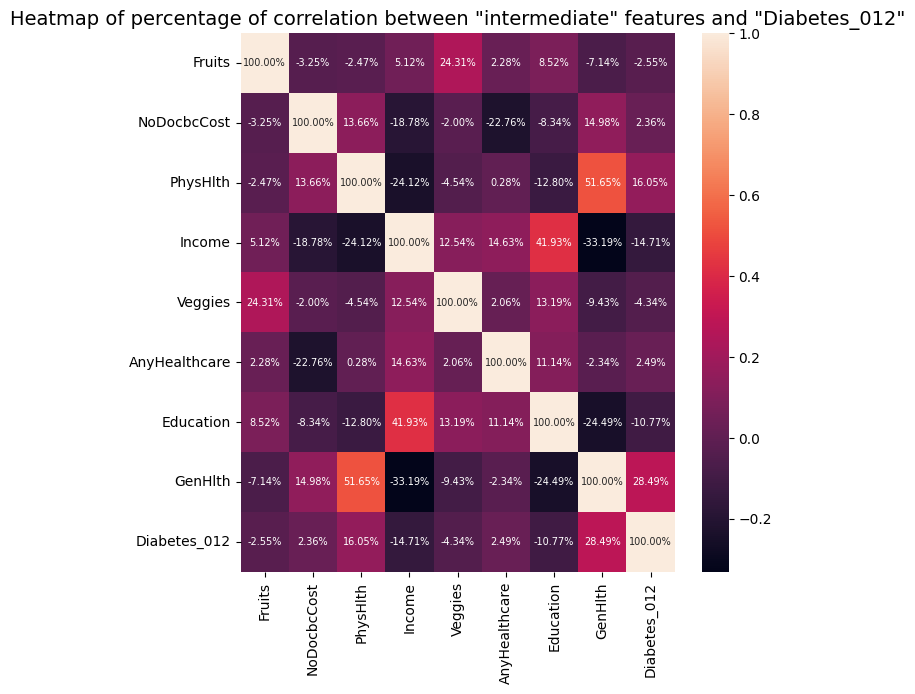

In [ ]:
# HEATMAP THAT SHOWS THE CORRELATION OF THE INTERMEDIATE FEATURES TO 'Diabetes_012'
intermediate_corr.append("Diabetes_012")
plt.figure(figsize=(7, 7))
sb.heatmap(df[intermediate_corr].corr(), annot=True, fmt='.2%', annot_kws={'size': 7})
plt.title('Heatmap of percentage of correlation between "intermediate" features and "Diabetes_012"', fontsize=14);

Studying this heatmap of the "intermediate" features, it is clear that the feature **"GenHlth" accounts for the most meaningful impact on the diagnosis for Diabetes**, with a correlation of 28.49%. <br>
But also, it can be seen that **"GenHlth" correlates with most of the intermediate features**: "PhysHlth", "Income", "Education", "NoDocbcCost"...

Below, the correlation of the top 5 influencing features in Diabetes (excluding 'GenHlth'), and their correlation to 'GenHlth'. This shows to what extent factors for Diabetes are grouped by variable 'GenHlth'

In [ ]:
# Top 5 diabetes-correlating features:
# Because "GenHlth" is the top feature correlated with 'Diabetes_012', first
# top 6 features are extracted. Then 'GenHlth' is removed.
top5_features_cd_series = df.corr()['Diabetes_012'].replace(1,np.nan).abs().sort_values(ascending=False).head(6)
top5_features_cd = (top5_features_cd_series.index).tolist()
#(top5_features_cd).remove('GenHlth')

# Correlation of Top 5 diabetes-correlating features with "GenHlth"
max_values_cgh = df[top5_features_cd].corr()['GenHlth'].replace(1,np.nan).abs().sort_values(ascending=False).head(5)
print("List of the correlation between the top 5 diabetes-correlating features and 'GenHlth':\n ", max_values_cgh )

List of the correlation between the top 5 diabetes-correlating features and 'GenHlth':
  DiffWalk    0.446731
HighBP      0.272547
BMI         0.220021
HighChol    0.187922
Age         0.145403
Name: GenHlth, dtype: float64


Therefore, **"GenHlth"** groups the effect of a high number of other features, masking their individual effect on "Diabetes_012". Additionally, the feature is too general, and collects a subjective assessment. Because of this, it is concluded that it will be deleted.

In [ ]:
# # HEATMAP THAT SHOWS THE CORRELATION OF THE 'INTERMEDIATE FEATURES' AND "GenHlth"
# no_corr_diabetes= (no_corr_diabetes).tolist()
# no_corr_diabetes.append("GenHlth")
# plt.figure(figsize=(7, 7))
# sb.heatmap(df[no_corr_diabetes].corr(), annot=True, fmt='.2%', annot_kws={'size': 7})
# plt.title('Correlation between least-related to Diabetes features and "GenHlth"', fontsize=14);

In [ ]:
df.drop("GenHlth", axis=1, inplace=True)
df.shape

(229772, 19)

Now that "GenHlth" has been removed, the redundancy of variables can be better studied.

#### Second study:
Once the screen effect of "GenHlth" has been removed, variables with no correlation with "Diabetes_012" will be analised again, following the same strategy:
- Check whether they have a significant correlation wiht another features.
- Determine if this relation to other variables makes them redundant.

In [ ]:
# POORLY CORRELATED FEATURES: Features with correlation with "Diabetes_012" < 0.1
no_corr_diabetes = df.columns[(df.corr()["Diabetes_012"]<0.1)]

# Max correlation value of this features in the whole dataframe
max_values_ncd = df.corr().replace(1,np.nan).abs().describe().loc['max', no_corr_diabetes]

# INTERMEDIATE FEATURES: Attributes to which they correlate the most.
intermediate_correlations=[]
for feature in max_values_ncd.index:
    name = df.columns[df.corr().abs()[feature]==max_values_ncd[feature]].tolist() # for every index in max_values_ncd,
    intermediate_correlations.append(name[0])                                     # find the column name where value
                                                                                  # matches the value in max_values_ncd
    print(feature," is most correlated to ", name[0])



Smoker  is most correlated to  Education
PhysActivity  is most correlated to  DiffWalk
Fruits  is most correlated to  Veggies
Veggies  is most correlated to  Fruits
AnyHealthcare  is most correlated to  NoDocbcCost
NoDocbcCost  is most correlated to  AnyHealthcare
MentHlth  is most correlated to  PhysHlth
Sex  is most correlated to  Income
Education  is most correlated to  Income
Income  is most correlated to  Education


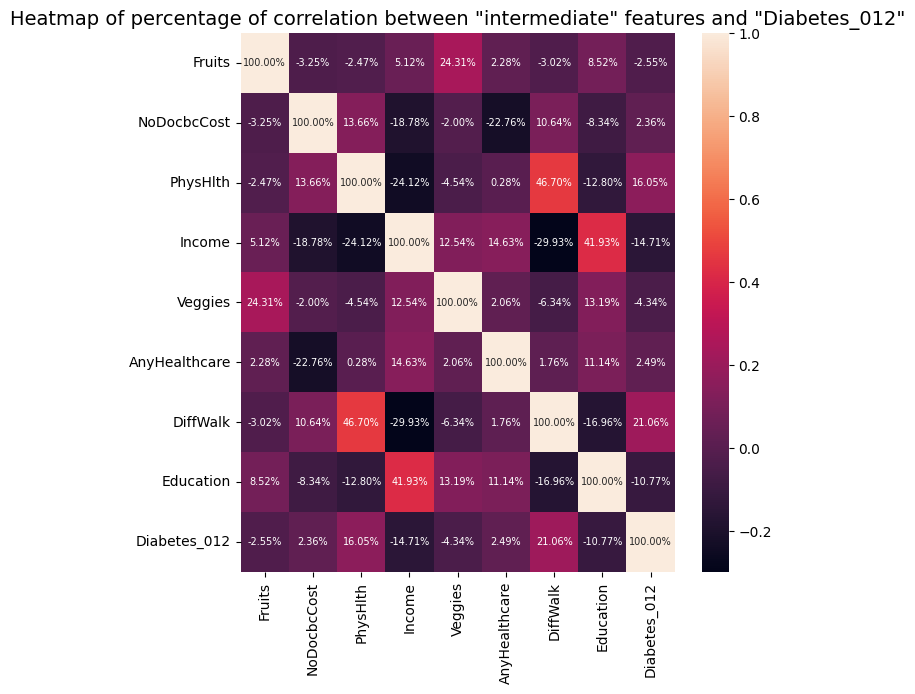

In [ ]:
# List of the most correlated variables with low-diabetes-correlation features
intermediate_corr = list(set(intermediate_correlations))

# HEATMAP THAT SHOWS THE CORRELATION OF THE INTERMEDIATE FEATURES TO 'Diabetes_012'
intermediate_corr.append("Diabetes_012")
plt.figure(figsize=(7, 7))
sb.heatmap(df[intermediate_corr].corr(), annot=True, fmt='.2%', annot_kws={'size': 7})
plt.title('Heatmap of percentage of correlation between "intermediate" features and "Diabetes_012"', fontsize=14);

In [ ]:
# # HEATMAP THAT SHOWS THE CORRELATION OF THE INTERMEDIATE FEATURES TO 'Diabetes_012'
# no_corr_diabetes= (no_corr_diabetes).tolist()
# no_corr_diabetes.append("GenHlth")
# plt.figure(figsize=(7, 7))
# sb.heatmap(df[no_corr_diabetes].corr(), annot=True, fmt='.2%', annot_kws={'size': 7})
# plt.title('Correlation between least-related to Diabetes features and "GenHlth"', fontsize=14);

Looks like PhysHlth is a variable that also groups many others...
I am going to stop "wasting" time reducint number of features manually...

## Transformation of data

### Adding labels of age category:

In [ ]:
# Define a map dictionary for age categories
age_category_map = {
    1: '18-24',
    2: '25-29',
    3: '30-34',
    4: '35-39',
    5: '40-44',
    6: '45-49',
    7: '50-54',
    8: '55-59',
    9: '60-64',
    10: '65-69',
    11: '70-74',
    12: '75-79',
    13: '80+'
}

# Create a new column 'age_category_name' by mapping the numerical age categories
df_numerical['age_category'] = df_numerical.loc[:,'Age'].map(age_category_map)
df_numerical[['Age', 'age_category']]

<ipython-input-75-0f893f32d708>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerical['age_category'] = df_numerical.loc[:,'Age'].map(age_category_map)


,Age,age_category
0,9.0,60-64
1,7.0,50-54
2,9.0,60-64
3,11.0,70-74
4,11.0,70-74
...,...,...
253675,5.0,40-44
253676,11.0,70-74
253677,2.0,25-29
253678,7.0,50-54


### Scaling data:
Because various models will be tested, including distanced-based algorithms, a scaled version of the dataset will be created.

In [ ]:
scaler = MinMaxScaler() #((0,10)): to set the range of scaled data to (0,10)
features_to_scale = df.drop('Diabetes_012', axis=1)

data_scaled = scaler.fit_transform(features_to_scale) # type of data np.array
df_scaled = pd.DataFrame(data_scaled, columns=features_to_scale.columns, index=features_to_scale.index)# Transformation to dataframe
df_scaled["Diabetes_012"] = df["Diabetes_012"]

### Resampling to deal with imbalance of "Diabetes_012".
There is a clear imbalance in the dataset regarding the target variable "Diabetes_012". This can have large consequences in the performance of the trained model.

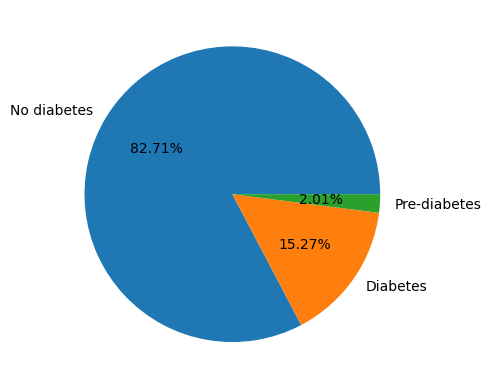

In [ ]:
labels = ["No diabetes", "Diabetes", "Pre-diabetes"]
plt.pie(df_scaled["Diabetes_012"].sort_values().value_counts(), labels=labels, autopct='%.02f%%');

In [ ]:
df_scaled.describe()

,HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,AnyHealthcare,NoDocbcCost,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_012
count,229772.000000,229772.000000,229772.000000,229772.000000,229772.000000,229772.000000,229772.000000,229772.000000,229772.000000,229772.000000,229772.000000,229772.000000,229772.000000,229772.000000,229772.000000,229772.000000,229772.000000,229772.000000,229772.000000
mean,0.454459,0.441768,0.346425,0.465675,0.044757,0.103220,0.733344,0.612955,0.794805,0.946073,0.092814,0.116850,0.155845,0.185514,0.439222,0.590558,0.796106,0.698614,0.325640
std,0.497923,0.496599,0.133895,0.498821,0.206771,0.304246,0.442212,0.487075,0.403845,0.225875,0.290172,0.257128,0.301557,0.388715,0.496293,0.257815,0.198579,0.298925,0.724634
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.416667,0.600000,0.571429,0.000000
50%,0.000000,0.000000,0.312500,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.583333,0.800000,0.714286,0.000000
75%,1.000000,1.000000,0.416667,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.066667,0.133333,0.000000,1.000000,0.750000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [ ]:
df_scaled.shape

(229772, 19)

In [ ]:
df.shape

(229772, 19)

For an imbalanced class dataset F1 score is a more appropriate metric. After checking it, i will oversample...
https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/#h-what-is-imbalanced-data-and-how-to-handle-it

In order to deal with this imbalance, methods like undersampling or upsampling can be applied.

# (1) Functions to model different datasets:
 These functions will be used to create subdatasets from undersampling techniques, upsampling techniques, with the whole number of orignial rows, with scaled data, etc.

In [ ]:
def num_of_each_diabetes_category(df):
    """
    df: dataframe containing feature "Diabetes_012".
    *df can be scaled with minMax scaling.

    Returns 3 variables (int), containing the total data of each "Diabetes_012" category.
    """
    n_diabetes_0 = (df['Diabetes_012']==0).sum()
    n_diabetes_1 = (df['Diabetes_012']==1).sum()
    n_diabetes_2 = (df['Diabetes_012']==2).sum()
    # print("Number of data with NO diabetes: ", n_diabetes_0)
    # print("Number of data with PRE diabetes: ", n_diabetes_1)
    # print("Number of data with diabetes: ", n_diabetes_2)

    return n_diabetes_0, n_diabetes_1, n_diabetes_2

In [ ]:
def count_diabetes_and_create_df(df):
    """
    df: dataframe containing feature "Diabetes_012"

    returns 3 different dtfs, one for each category of "Diabetes_012", and
    a tuple with the result of calling function num_of_each_diabetes_category
    """
    #create different dataframes of majority and minority classes
    df_diab0 = df[(df['Diabetes_012']==0)]
    df_diab1 = df[(df['Diabetes_012']==1)]
    df_diab2 = df[(df['Diabetes_012']==2)]

    return df_diab0, df_diab1, df_diab2, num_of_each_diabetes_category(df)


In [ ]:
def undersample_dataframe(df, n_samples):
    """
    df: dataframe to undersample
    n_samples: number of data in the new undersampled df.

    returns undersampled df.
    """
    # print("Undersampling...")
    return resample(df,
                    replace=False,            # sample with replacement
                    n_samples= n_samples,
                    random_state=42)          # reproducible results

In [ ]:
def oversample_dataframe(df, key_label, n_samples):
    """
    df: dataframe conaining the minority class to oversample.
    n_samples: number of data of the minority class in the df.
    key_label = value of the minority class to oversample

    returns dataframe of the minority class, including the new generated
    values with SMOTE oversampling.
    """
    # print("Oversampling...")
    smote = SMOTE(sampling_strategy={key_label: n_samples}) #Class label 1 is the minority
    df_of_diabkey_label_oversampled, _ = smote.fit_resample(df, df['Diabetes_012'])
    return df_of_diabkey_label_oversampled[(df_of_diabkey_label_oversampled['Diabetes_012']==key_label)]

In [ ]:
def create_balanced_df_to_diabetes0(df):
    """
    df: dataframe containing feature "Diabetes_012"

    returns a balance dataframe where number of all "Diabetes_012" categories
    equals number of data with Diabetes_012 == 0.
    """
    df_diab0, df_diab1, df_diab2, num_diabetes = count_diabetes_and_create_df(df)

    df_diab1_oversampled = oversample_dataframe(df, 1, num_diabetes[0])
    df_diab2_oversampled = oversample_dataframe(df, 2, num_diabetes[0])

    # Combine majority class with upsampled minority class
    # print("Creating balanced dataframe for NO diabetes...")
    return pd.concat([df_diab0, df_diab1_oversampled, df_diab2_oversampled])

In [ ]:
def create_balanced_df_to_diabetes1(df):
    """
    df: dataframe containing feature "Diabetes_012"

    returns a balance dataframe where number of all "Diabetes_012" categories
    equals number of data with Diabetes_012 == 1.
    """
    df_diab0, df_diab1, df_diab2, num_diabetes = count_diabetes_and_create_df(df)

    df_diab0_undersampled = undersample_dataframe(df_diab0, num_diabetes[1])
    df_diab2_undersampled = undersample_dataframe(df_diab2, num_diabetes[1])

    # Combine majority class with upsampled minority class
    # print("Creating balanced dataframe for pre-diabetes...")
    return pd.concat([df_diab0_undersampled, df_diab1, df_diab2_undersampled])

In [ ]:
def create_balanced_df_to_diabetes2(df):
    """
    df: dataframe containing feature "Diabetes_012"

    returns a balance dataframe where number of all "Diabetes_012" categories
    equals number of data with Diabetes_012 == 2.
    """
    df_diab0, df_diab1, df_diab2, num_diabetes = count_diabetes_and_create_df(df)

    df_diab0_undersampled = undersample_dataframe(df_diab0, num_diabetes[2])
    df_diab1_oversampled = oversample_dataframe(df, 1, num_diabetes[2])

    # Combine majority class with upsampled minority class
    # print("Creating balanced dataframe for diabetes...")
    return pd.concat([df_diab0_undersampled, df_diab1_oversampled, df_diab2])

# (1) Modelling

In [ ]:
def train_and_evaluate_classification_models(X, y):
    """
    X: data (in the form of dataframe) of the features
    y: true labels, corresponding to data in X

    Function returns void.
    """

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize classifiers
    decision_tree = DecisionTreeClassifier()
    random_forest = RandomForestClassifier()
    gaussian_nb = GaussianNB()
    knn = KNeighborsClassifier()
    svm = SVC()
    logistic_regression = LogisticRegression()
    xgboost = XGBClassifier()

    # Train and evaluate each model
    models = [decision_tree, gaussian_nb, knn, svm,
              logistic_regression, random_forest, xgboost]
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average="weighted")
        recall = recall_score(y_test, y_pred, average="weighted")
        f1 = f1_score(y_test, y_pred, average="weighted")

        # Print or store the evaluation metrics
        #formatted string literal: syntax for embedding expressions inside string literals.
        print(f"{model.__class__.__name__} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")



Various modified datasets will be created, in order to test whith which preprocessing steps are the best models achieved.

In [ ]:
# DATASETS OF TRIMMED DATA:
# balanced_df_diab0 = create_balanced_df_to_diabetes0(df)
balanced_df_diab1 = create_balanced_df_to_diabetes1(df)
balanced_df_diab2 = create_balanced_df_to_diabetes2(df)

# List:
list_trimmed_df = (balanced_df_diab1, balanced_df_diab2)
names_for_trimmed_df = ("Trimmed data balanced to PRE-diabetes",
                        "Trimmed data balanced to diabetes")

# DATASETS OF ORIGINAL FEATURES:
# balanced_df_diab0 = create_balanced_df_to_diabetes0(df_originalFeatures)
balanced_df_diab1 = create_balanced_df_to_diabetes1(df_originalFeatures)
balanced_df_diab2 = create_balanced_df_to_diabetes2(df_originalFeatures)

# List:
list_oriFeat_df = (balanced_df_diab1, balanced_df_diab2)
names_for_oriFeat_df = ("Original features data balanced to PRE-diabetes",
                        "Original features data balanced to diabetes")

# DATASETS OF ORIGINAL ROWS:
# balanced_df_diab0 = create_balanced_df_to_diabetes0(originalRows_df)
balanced_df_diab1 = create_balanced_df_to_diabetes1(originalRows_df)
balanced_df_diab2 = create_balanced_df_to_diabetes2(originalRows_df)

# List:
list_oriRows_df = (balanced_df_diab1, balanced_df_diab2)
names_for_oriRows_df = ("Data with original rows balanced to PRE-diabetes",
                        "Data with original rows balanced to diabetes")

In [ ]:
print("TRIMMED DATA")
for i in range(len(list_trimmed_df)):
    # Divide dataset in data and labels.
    list_X = []
    list_y = []
    for df in list_trimmed_df:
        list_X.append(df.drop('Diabetes_012', axis=1, inplace=False))
        list_y.append(df['Diabetes_012'])

    print(f"For {names_for_trimmed_df[i]}")
    train_and_evaluate_classification_models(list_X[i], list_y[i], use_pca=False)
    print("\n")

TRIMMED DATA
For Trimmed data balanced to PRE-diabetes
DecisionTreeClassifier - Accuracy: 0.4035, Precision: 0.4044, Recall: 0.4035, F1: 0.4039
RandomForestClassifier - Accuracy: 0.4734, Precision: 0.4719, Recall: 0.4734, F1: 0.4715
GaussianNB - Accuracy: 0.4658, Precision: 0.4528, Recall: 0.4658, F1: 0.4341
KNeighborsClassifier - Accuracy: 0.4158, Precision: 0.4104, Recall: 0.4158, F1: 0.4095


For Trimmed data balanced to diabetes
DecisionTreeClassifier - Accuracy: 0.6779, Precision: 0.6762, Recall: 0.6779, F1: 0.6770
RandomForestClassifier - Accuracy: 0.7507, Precision: 0.7645, Recall: 0.7507, F1: 0.7556
GaussianNB - Accuracy: 0.5052, Precision: 0.5023, Recall: 0.5052, F1: 0.4988
KNeighborsClassifier - Accuracy: 0.6468, Precision: 0.6559, Recall: 0.6468, F1: 0.6245




In [ ]:
print("ORIGINAL FEAT DATA")
for i in range(len(list_oriFeat_df)):
    # Divide dataset in data and labels.
    list_X = []
    list_y = []
    for df in list_oriFeat_df:
        list_X.append(df.drop('Diabetes_012', axis=1, inplace=False))
        list_y.append(df['Diabetes_012'])

    print(f"For {names_for_oriFeat_df[i]}")
    train_and_evaluate_classification_models(list_X[i], list_y[i], use_pca=False)
    print("\n")

ORIGINAL FEAT DATA
For Original features data balanced to PRE-diabetes
DecisionTreeClassifier - Accuracy: 0.3920, Precision: 0.3939, Recall: 0.3920, F1: 0.3928
RandomForestClassifier - Accuracy: 0.4766, Precision: 0.4743, Recall: 0.4766, F1: 0.4742
GaussianNB - Accuracy: 0.4798, Precision: 0.4602, Recall: 0.4798, F1: 0.4505
KNeighborsClassifier - Accuracy: 0.4287, Precision: 0.4257, Recall: 0.4287, F1: 0.4250


For Original features data balanced to diabetes
DecisionTreeClassifier - Accuracy: 0.6903, Precision: 0.6878, Recall: 0.6903, F1: 0.6890
RandomForestClassifier - Accuracy: 0.7706, Precision: 0.7846, Recall: 0.7706, F1: 0.7750
GaussianNB - Accuracy: 0.5143, Precision: 0.5193, Recall: 0.5143, F1: 0.5160
KNeighborsClassifier - Accuracy: 0.6505, Precision: 0.6669, Recall: 0.6505, F1: 0.6295




In [ ]:
print("ORIGINAL ROW DATA")
for i in range(len(list_oriRows_df)):
    # Divide dataset in data and labels.
    list_X = []
    list_y = []
    for df in list_oriRows_df:
        list_X.append(df.drop('Diabetes_012', axis=1, inplace=False))
        list_y.append(df['Diabetes_012'])

    print(f"For {names_for_oriRows_df[i]}")
    train_and_evaluate_classification_models(list_X[i], list_y[i], use_pca=False)
    print("\n")

ORIGINAL ROW DATA
For Data with original rows balanced to PRE-diabetes
DecisionTreeClassifier - Accuracy: 0.4149, Precision: 0.4160, Recall: 0.4149, F1: 0.4154
RandomForestClassifier - Accuracy: 0.4869, Precision: 0.4849, Recall: 0.4869, F1: 0.4855
GaussianNB - Accuracy: 0.5013, Precision: 0.4861, Recall: 0.5013, F1: 0.4585
KNeighborsClassifier - Accuracy: 0.4552, Precision: 0.4541, Recall: 0.4552, F1: 0.4493


For Data with original rows balanced to diabetes
DecisionTreeClassifier - Accuracy: 0.7014, Precision: 0.7000, Recall: 0.7014, F1: 0.7007
RandomForestClassifier - Accuracy: 0.7812, Precision: 0.7948, Recall: 0.7812, F1: 0.7853
GaussianNB - Accuracy: 0.5335, Precision: 0.5340, Recall: 0.5335, F1: 0.5333
KNeighborsClassifier - Accuracy: 0.6635, Precision: 0.6822, Recall: 0.6635, F1: 0.6445




In [ ]:
#  # Apply PCA if specified
#     if use_pca:
#         scaler = StandardScaler()
#         X_train = scaler.fit_transform(X_train)
#         X_test = scaler.transform(X_test)

#         pca = PCA(n_components=0.99)  # Adjusting the explained variance
#         X_train = pca.fit_transform(X_train)
#         X_test = pca.transform(X_test)


In this project, the aim is to predict Type 2 diabetes, which in general develops at middle age.

A respondent was considered to have type 2 diabetes if the respondent was older than 30, not pregnant, and answered yes to the question “Have you ever been told you have diabetes?”
